## Clusterização Parcial

### Implementando o KMeans

In [2]:
# Importando as bibliotecas e ferramentas

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='pastel')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importando os dados
df = pd.read_csv('tamanho_pinguins.csv')
df.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Apagando as linhas com os dados faltando e retirando
# outliers
df = df.dropna()

In [5]:
df = df[df.larg_bico_mm < 50]

In [7]:
# Separando os dados numericos e as especies em dfs diferentes

x = df.iloc[:,2:-1]
y = df.iloc[:,0]

In [9]:
# Normalizando os dados com o MinMaxScaler

scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [11]:
# Selecionado 2 colunas para facilitar a visualização gráfica

x2 = x_[:,[0,2]]

In [14]:
# Criando uma função de Kmeans
def k_means (data, k, threshhold=2):
    n = np.size(data,0)
    
    cluster_centers = np.random.choice(range(0,n), k)
    clustering = np.random.randint(0,k,n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        cluster_distance = np.zeros((n,k))
        for cluster in range(k):
            cluster_distance[:, cluster] = np.sum(np.sqrt((data-cluster_means[cluster])**2),1)
        clustering = np.argmin(cluster_distance,1)
        
        cluster_means = np.array([np.mean(data[clustering==c],0) for c in range(k)])
        
    return cluster_means, clustering

In [15]:
centers, labels = k_means(x2,3)

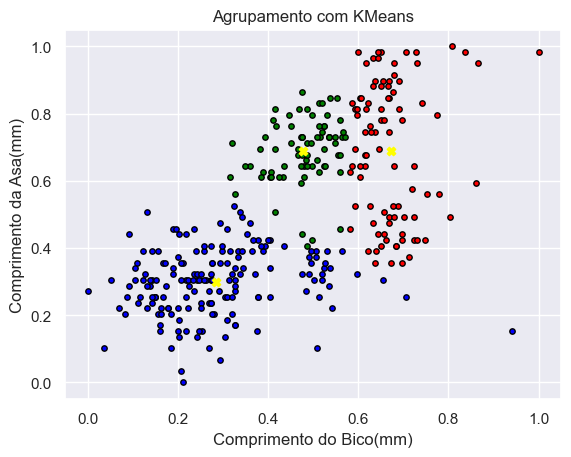

In [20]:
# Plotando os dados
plt.scatter (x2[labels== 0,0], x2[labels == 0,1], color = 'blue', edgecolors='black', s=15)
plt.scatter (x2[labels== 1,0], x2[labels == 1,1], color = 'red', edgecolors='black', s=15)
plt.scatter (x2[labels== 2,0], x2[labels == 2,1], color = 'green', edgecolors='black', s=15)
plt.scatter (centers[:,0], centers[:,1], color='yellow', marker='X')
plt.xlabel('Comprimento do Bico(mm)')
plt.ylabel('Comprimento da Asa(mm)')
plt.title('Agrupamento com KMeans')
plt.show()


## Algoritmo KMedoids

In [22]:
# Criando uma função para o KMedoids

def k_medoids (data, k, threshhold=2):
    n = np.size(data,0)
    
    cluster_centers = np.random.choice(range(0,n), k)
    clustering = np.random.randint(0,k,n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        cluster_distance = np.zeros((n,k))
        for cluster in range(k):
            cluster_distance[:, cluster] = np.sum(np.sqrt((data-cluster_means[cluster])**2),1)
        clustering = np.argmin(cluster_distance,1)
        
        temp_cluster_means = np.array([np.mean(data[clustering==c],0) for c in range(k)])
        cluster_means = []
        for ncluster in range(k):
            distances_means = np.sum(np.sqrt((data[clustering == ncluster] - temp_cluster_means[ncluster])**2),1)
            cluster_means.append(list(data[clustering == ncluster][np.argmin(distances_means)]))
            
            
        
    return np.array(cluster_means), clustering

In [26]:
# Treinando o algoritmo KMedoids com os dados

centers, labels = k_medoids(x2, 3)

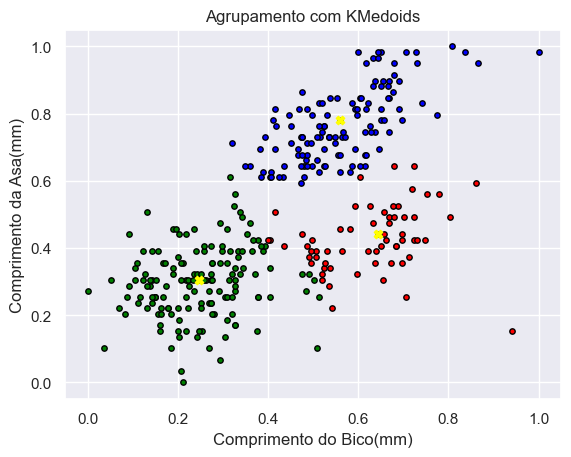

In [27]:
# Plotando os dados
plt.scatter (x2[labels== 0,0], x2[labels == 0,1], color = 'blue', edgecolors='black', s=15)
plt.scatter (x2[labels== 1,0], x2[labels == 1,1], color = 'red', edgecolors='black', s=15)
plt.scatter (x2[labels== 2,0], x2[labels == 2,1], color = 'green', edgecolors='black', s=15)
plt.scatter (centers[:,0], centers[:,1], color='yellow', marker='X')
plt.xlabel('Comprimento do Bico(mm)')
plt.ylabel('Comprimento da Asa(mm)')
plt.title('Agrupamento com KMedoids')
plt.show()